### Exercise

### Exercise 1: Identify Suspicious Email Domains
- Find the top 5 most frequent email domains in fraudulent transactions.
- Write a function to flag transactions from less common domains.

- **Topics:** String manipulation, Pandas DataFrames, Aggregation
- **Resources:**
  - [Pandas String Methods](https://pandas.pydata.org/docs/user_guide/text.html)
  - [Regular Expressions in Python](https://docs.python.org/3/library/re.html)
  - [Finding Frequent Elements in Pandas](https://towardsdatascience.com/finding-the-most-frequent-elements-in-a-pandas-dataframe-b29d01fe43cf)

In [102]:
import pandas as pd
import re

##Exercice 1 use the dateset CC_FRAUD.csv

df_1 = pd.read_csv("CC_FRAUD.csv")

##Find the 5 most 5 email domain

df_2 = df_1.groupby("DOMAIN").size().sort_values(ascending=False).head(5)

print(df_2)

##Function to flag the less common domain

def less_common(x):
    if x!="TMA.COM" and x!="XOSOP.COM" and x!="VUHZRNB.COM" and x!="TCN.COM" and x!="NEKSXUK.NET":
        return "high"
    else:
        return "low"

df_1["SECURITY"] = df_1["DOMAIN"].apply(lambda x:less_common(x))

df_1["SECURITY"]

DOMAIN
TMA.COM        16451
XOSOP.COM      15814
VUHZRNB.COM    11544
TCN.COM         4029
NEKSXUK.NET     3918
dtype: int64


0        high
1         low
2         low
3         low
4         low
         ... 
94677     low
94678    high
94679     low
94680     low
94681     low
Name: SECURITY, Length: 94682, dtype: object

### Exercise 2: Regular Expressions for Data Validation
- Validate that email addresses in the dataset are correctly formatted.
- Identify and extract all numeric values appearing in descriptions.

- **Topics:** Regex for validation, extracting numerical data, pattern matching
- **Resources:**
  - [Python Regular Expressions Official Docs](https://docs.python.org/3/library/re.html)
  - [Regex101 - Online Regex Tester](https://regex101.com/) (for testing expressions)
  - [Validating Email Addresses with Regex](https://www.geeksforgeeks.org/check-if-email-address-valid-or-not-in-python/)
  - [Extracting Numbers from Text in Python](https://www.datacamp.com/tutorial/python-regular-expression-tutorial)

In [103]:
import pandas as pd

#Exercice 2 use theses datasets:bank_transactions_data_2 AND fraud_detection_dataset.csv
#Validate the e-mail address

df_3 = pd.read_csv("fraud_detection_dataset.csv")

def isValide(email):
    pattern = r"^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$"
    #email = "user@example.com"
    return "Valid" if re.match(pattern, email) else "Invalid"

df_3["Email_validation"] = df_3["Customer_Email"].apply(isValide)

df_3[["Email_validation","Customer_Email"]].head()

,Email_validation,Customer_Email
0,Valid,amygreen@example.com
1,Valid,nicoleferguson@example.net
2,Valid,fergusonmatthew@example.net
3,Valid,williamsshirley@example.com
4,Valid,bondmitchell@example.org


In [104]:
#Extract all numeric values from account ID

df_4 = pd.read_csv("bank_transactions_data_2.csv")

def isNumeric(ID):
    pattern = r"\d+"
    a = re.findall(pattern,ID)
    return a

df_4["AccountID(only number)"] = df_4["AccountID"].apply(isNumeric)

df_4[["AccountID","AccountID(only number)"]]

,AccountID,AccountID(only number)
0,AC00128,[00128]
1,AC00455,[00455]
2,AC00019,[00019]
3,AC00070,[00070]
4,AC00411,[00411]
...,...,...
2507,AC00297,[00297]
2508,AC00322,[00322]
2509,AC00095,[00095]
2510,AC00118,[00118]


### Exercise 3: Optimize the Algorithm
- Improve fraud detection by incorporating past customer transaction history.
- Implement an efficient way to flag repeated transactions within a short period.

- **Topics:** Algorithm optimization, time complexity, transaction analysis
- **Resources:**
  - [Python Performance Optimization](https://realpython.com/python-performance/)
  - [Big-O Notation for Algorithm Complexity](https://www.geeksforgeeks.org/analysis-of-algorithms-big-o-analysis/)
  - [Efficient Transaction Processing Techniques](https://www.kaggle.com/learn/data-cleaning)

In [105]:
# Exercise 3 use dataset Bank_Transaction_Fraud_Detection.csv

df_5 = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")
df_5.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [106]:
from datetime import datetime

df_5["Transfered_date"] = df_5["Transaction_Date"].apply(lambda x: datetime.strptime(x,"%d-%m-%Y"))
df_5[["Transfered_date","Transaction_Date"]].head()

,Transfered_date,Transaction_Date
0,2025-01-23,23-01-2025
1,2025-01-11,11-01-2025
2,2025-01-25,25-01-2025
3,2025-01-19,19-01-2025
4,2025-01-30,30-01-2025


In [107]:
df_5["Transaction_times"] = df_5.groupby("Customer_Name")["Customer_Name"].transform("count")
df_5[["Customer_Name","Transaction_times"]].head()


,Customer_Name,Transaction_times
0,Osha Tella,2
1,Hredhaan Khosla,1
2,Ekani Nazareth,1
3,Yamini Ramachandran,4
4,Kritika Rege,2


In [108]:
df_5_transfer = df_5[df_5["Transaction_times"]>1].groupby(["Customer_Name","Transfered_date"])["Transaction_ID"].count().reset_index()
df_5_transfer

,Customer_Name,Transfered_date,Transaction_ID
0,Aachal Acharya,2025-01-21,1
1,Aachal Acharya,2025-01-23,1
2,Aachal Acharya,2025-01-25,1
3,Aachal Agarwal,2025-01-03,1
4,Aachal Agarwal,2025-01-25,1
...,...,...,...
99591,Zinal Vora,2025-01-28,1
99592,Zinal Wason,2025-01-03,1
99593,Zinal Wason,2025-01-29,1
99594,Zinal Yogi,2025-01-17,1


In [109]:
# We assume that if a customer do 3 transactions in 5 days, we mark that he or she perform fraud transaction.

def mark_fraud(group):    
    group = group.set_index("Transfered_date")

    group["Transaction_count"] = group.rolling("5D").count()["Transaction_ID"]

    group["Fraud"] = group["Transaction_count"] >= 3
    
    return group


df_5_transfer = df_5_transfer.groupby("Customer_Name", group_keys=False).apply(mark_fraud)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2540\1222096740.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_5_transfer = df_5_transfer.groupby("Customer_Name", group_keys=False).apply(mark_fraud)


In [110]:
Name_of_customer_of_fraud_transaction = df_5_transfer[df_5_transfer["Fraud"]]["Customer_Name"].tolist()

print("Fraud transaction customer:",Name_of_customer_of_fraud_transaction)

Fraud transaction customer: ['Aachal Acharya', 'Aadhya Boase', 'Aadhya Rajagopal', 'Aahana Kala', 'Aarnav Anand', 'Aarnav Barad', 'Aayush Gupta', 'Aayush Patel', 'Abeer Nagar', 'Abha Karnik', 'Abha Karnik', 'Abha Manda', 'Abhiram Puri', 'Aditya Banerjee', 'Advaith Kaul', 'Adya Jani', 'Adya Luthra', 'Agastya Hans', 'Agastya Nair', 'Agastya Nair', 'Agastya Varughese', 'Aishani Kala', 'Akshay Chahal', 'Alexander Bhardwaj', 'Alka Bora', 'Alka Patla', 'Amaira Shroff', 'Amaira Tella', 'Amrita Minhas', 'Amrita Subramanian', 'Amrita Suresh', 'Amruta Dani', 'Amruta Dugar', 'Amruta Salvi', 'Anay Bumb', 'Anika Kala', 'Anika Srinivas', 'Anirudh Vora', 'Anirudh Vora', 'Anita Rajagopalan', 'Anita Rajagopalan', 'Anjali Datta', 'Anjali Vig', 'Anmol Narang', 'Anmol Narang', 'Ansh Vasa', 'Anusha Dixit', 'Anusha Ghosh', 'Anvi Oommen', 'Anvi Wali', 'Aradhana Padmanabhan', 'Aradhana Sha', 'Arunima Kala', 'Arunima Palla', 'Arya Ramaswamy', 'Aryan Bobal', 'Ati Ahluwalia', 'Ayaan Dhillon', 'Ayush Gade', 'Ayus

In [111]:
df_5["Fraud"] = df_5["Customer_Name"].apply(lambda x: True if x in Name_of_customer_of_fraud_transaction else False)
df_5[["Customer_Name","Fraud"]]

,Customer_Name,Fraud
0,Osha Tella,False
1,Hredhaan Khosla,False
2,Ekani Nazareth,False
3,Yamini Ramachandran,False
4,Kritika Rege,False
...,...,...
199995,Vedhika Magar,False
199996,Aashi Pai,False
199997,Dayita Shan,False
199998,Unnati Vyas,False


### Exercise 4: File Handling and Reporting
- Generate a summary report of fraudulent transactions and save it to a JSON file.
- Create a function that reads the JSON report and prints key insights.

- **Topics:** File I/O, JSON handling, saving structured reports
- **Resources:**
  - [Python File Handling](https://realpython.com/read-write-files-python/)
  - [Working with JSON in Python](https://realpython.com/python-json/)
  - [Generating and Parsing Reports in Pandas](https://towardsdatascience.com/how-to-generate-reports-with-python-and-pandas-166fdfaf0df4)

In [115]:
# EX4 use the result of EX3

import json

fraud_transactions = df_5[df_5["Fraud"] == True]

report = {
    "Number of transaction": len(df_5),
    "Number of fraud transaction": len(fraud_transactions),
    "Fraud transaction customer name": fraud_transactions["Customer_Name"].tolist(),
    "Fraud transaction detail": fraud_transactions.drop(columns = ["Transfered_date"]).to_dict()

}

with open("Report.json", "w") as file:
    json.dump(report,file)

In [118]:
def read_and_print_keys(str):
    with open(str,"r") as file:
        content = file.read()
        print(content)

read_and_print_keys("Report.json")

{"Number of transaction": 200000, "Number of fraud transaction": 2153, "Fraud transaction customer name": ["Devika Keer", "Urvashi Ravel", "Naveen Bains", "Lipika Bumb", "Ranbir Chhabra", "Veer Loke", "Viraj Sangha", "Pratyush Merchant", "Anirudh Vora", "Eiravati Bora", "Agastya Nair", "Kalpit Dhar", "Shravya Wali", "Gauri Sharaf", "Amruta Dani", "Urvashi Solanki", "Ronith Nori", "Yashodhara Sibal", "Radhika Sarin", "Ranbir Chhabra", "Wridesh Kapur", "Oscar Bora", "Divya Butala", "Bishakha Mani", "Vasudha Bala", "Madhav Oak", "Harshil Kala", "Tanveer Dara", "Vivaan Das", "Veer Vora", "Jagdish Bora", "Agastya Hans", "Balhaar Bhatt", "Anmol Narang", "Keya Pillay", "Nidhi Khatri", "Harsh Dara", "Forum Tella", "Ijaya Madan", "Ojasvi Hayer", "Dominic Joshi", "Nachiket Kala", "Zilmil Chaudry", "Waida Jain", "Amrita Minhas", "Krishna Nair", "Ekani Goel", "Bhavna Din", "Prisha Kala", "Quincy Wali", "Kiaan Subramanian", "Fiyaz Sibal", "Vedhika Patla", "Teerth Saran", "Gautami Palan", "Naveen Ba

### **Exercise 5: Improve Fraud Detection using Data Patterns**
- **Topics:** Fraud detection, anomaly detection, historical analysis
- **Resources:**
  - [Introduction to Fraud Detection with Python](https://www.kaggle.com/datasets/ntnu-testimon/paysim1)
  - [Scikit-learn Outlier Detection Techniques](https://scikit-learn.org/stable/modules/outlier_detection.html)
  - [Building a Machine Learning-Based Fraud Detection System](https://towardsdatascience.com/credit-card-fraud-detection-using-machine-learning-726ed4e3b3af)
  - [Anomaly Detection in Pandas](https://towardsdatascience.com/anomaly-detection-in-python-part-1-49b65b0522dc)


In [120]:
df_6 = pd.read_csv("application_data.csv")
df_6.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


We will clean the dataset first.

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = df_6.replace(" ", np.nan)
data_null = data.isnull().sum()
data_null = data_null.reset_index()
data_null.columns = ['Column', 'Missing Values']
data_null["With missing values"] = data_null["Missing Values"].apply(lambda x : x>0)

list_of_columns_missing_data = data_null[data_null["With missing values"]]["Column"].tolist()

list_of_columns_missing_data

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

In [145]:
list_of_columns_missing_data

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

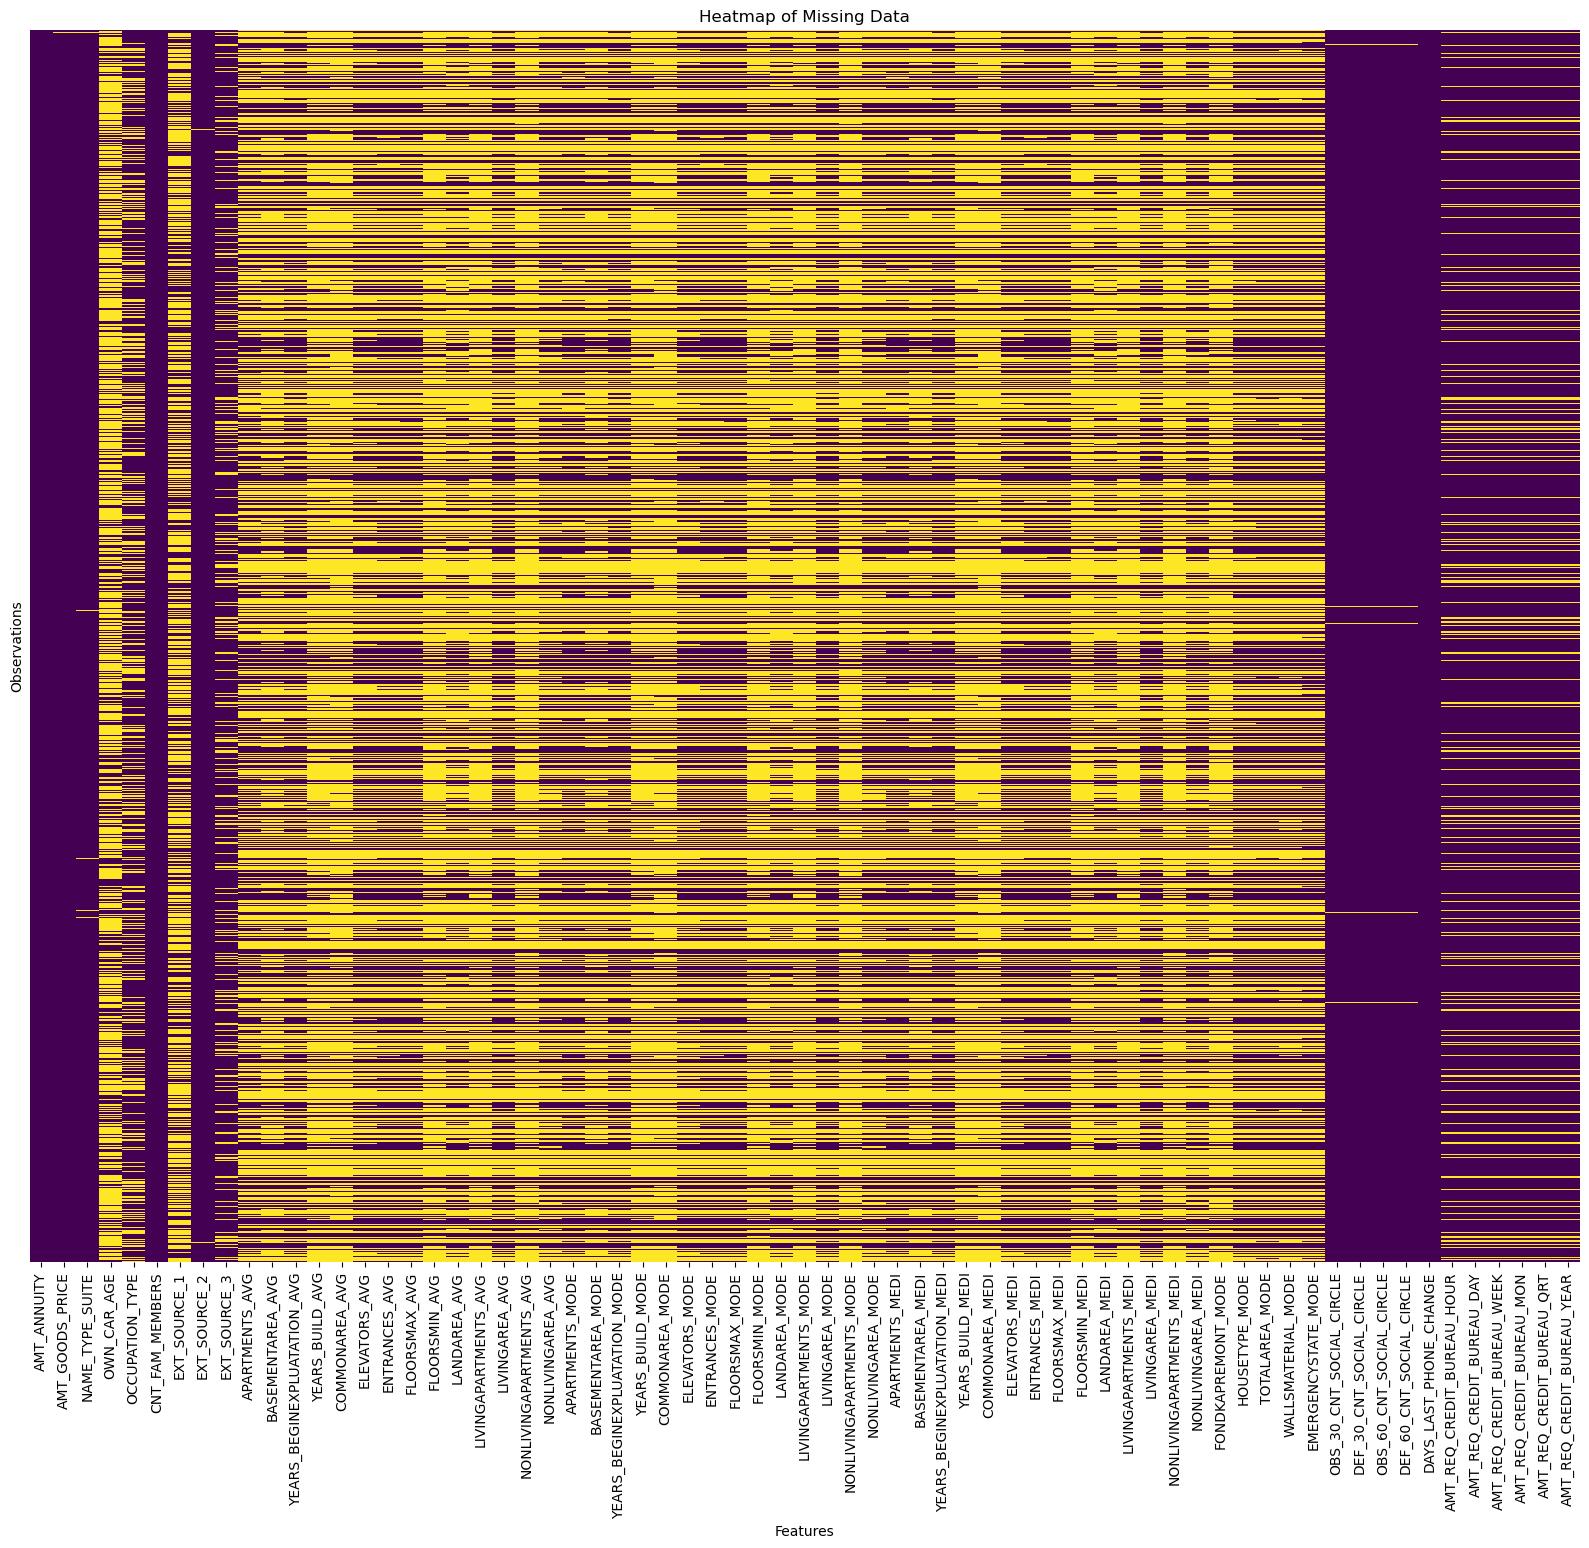

In [143]:
plt.figure(figsize=(20, 16))
sns.heatmap(data[list_of_columns_missing_data].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()

Now we drop those columns which miss many datas.

In [181]:

colums_hold = ['AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','CNT_FAM_MEMBERS','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']
df_6_cleaned = df_6.copy()

for x in list_of_columns_missing_data:
    if x not in colums_hold:
        df_6_cleaned = df_6_cleaned.drop(columns=x)

Now we see the rest columns.

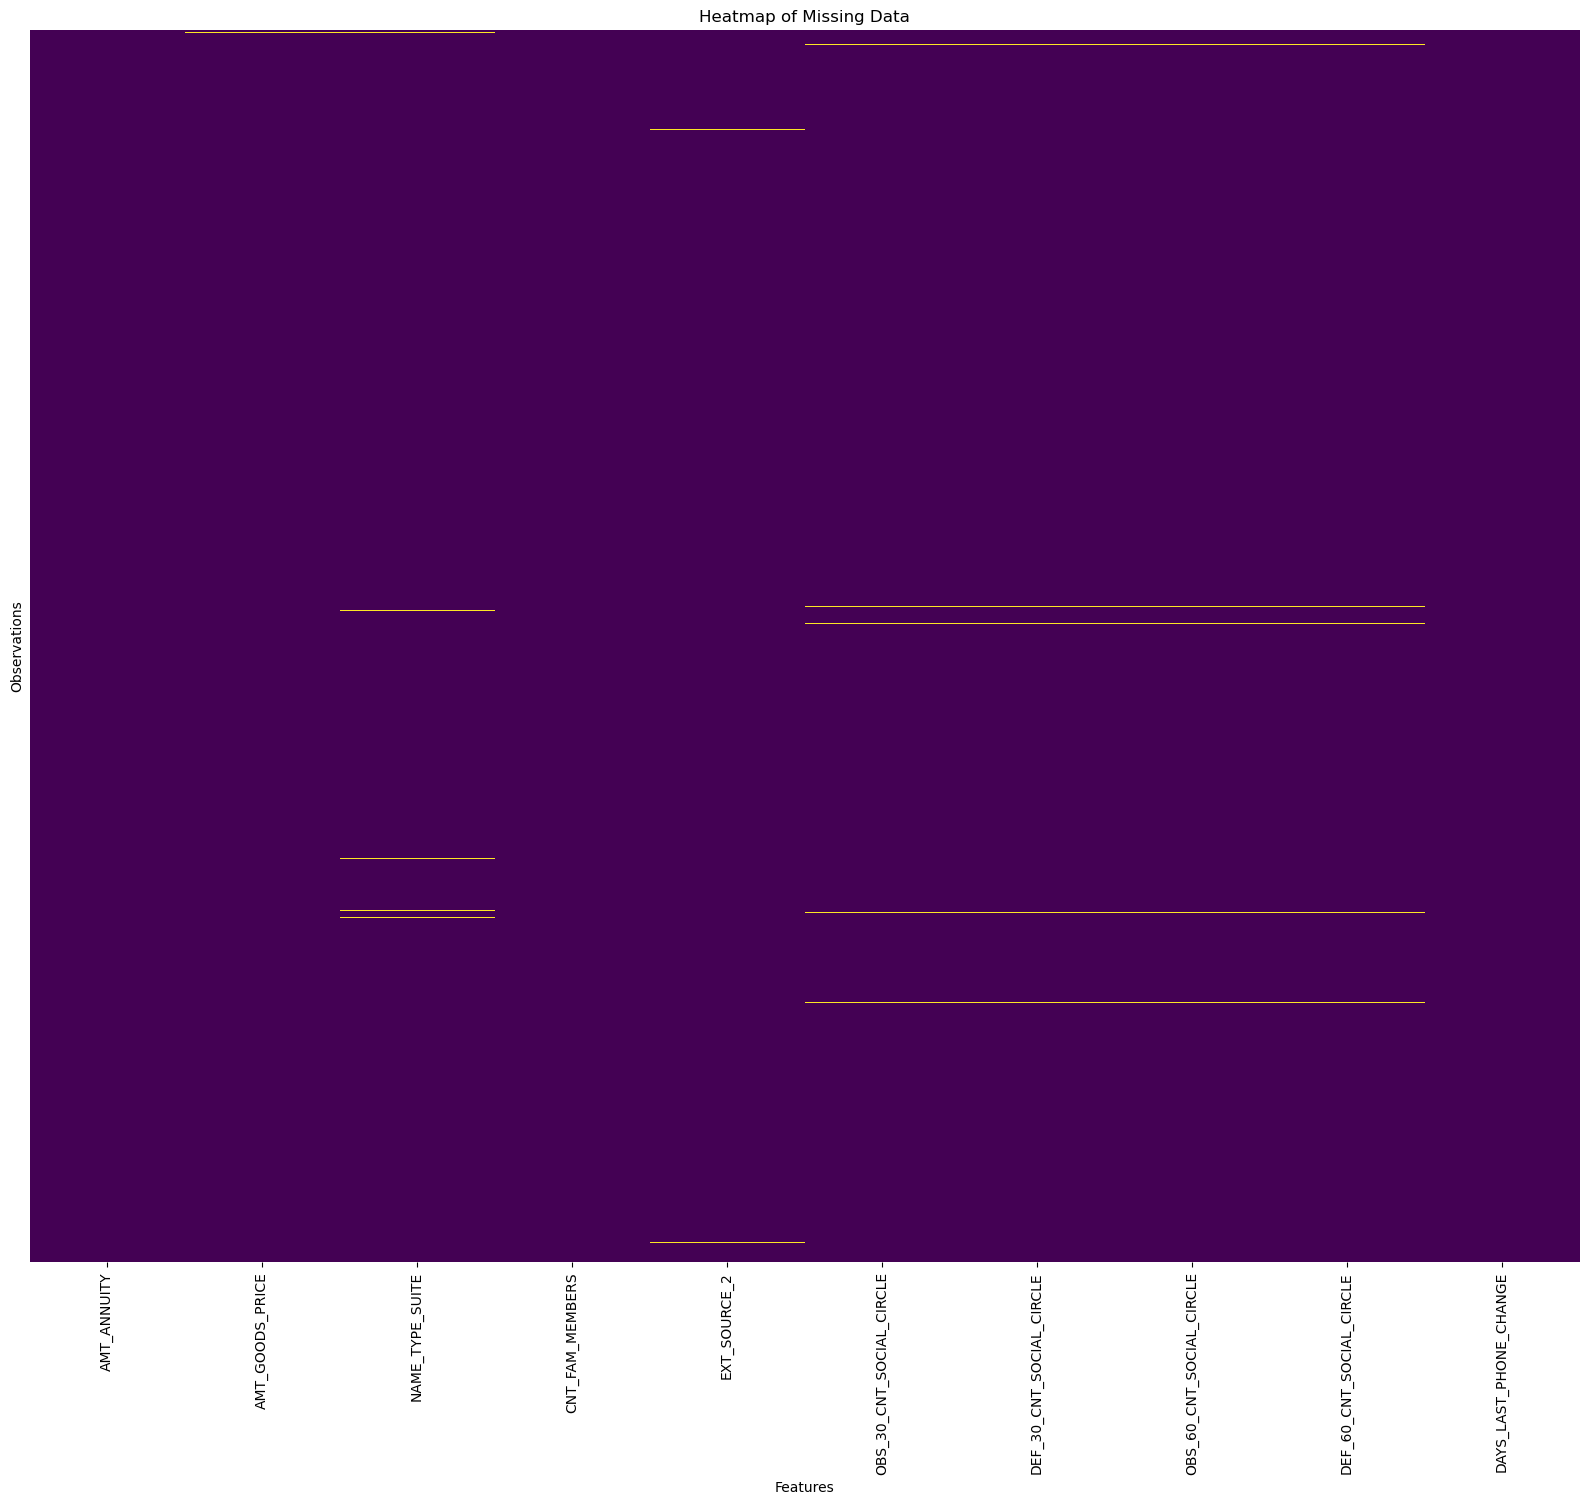

In [182]:
plt.figure(figsize=(20, 16))
sns.heatmap(data[colums_hold].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()

In [183]:
for x in colums_hold:
    print(x,":",df_6_cleaned[x].dtype)

print("--------------------------------------------")

a = df_6_cleaned.groupby("NAME_TYPE_SUITE")["NAME_TYPE_SUITE"].count()
print(a)

AMT_ANNUITY : float64
AMT_GOODS_PRICE : float64
NAME_TYPE_SUITE : object
CNT_FAM_MEMBERS : float64
EXT_SOURCE_2 : float64
OBS_30_CNT_SOCIAL_CIRCLE : float64
DEF_30_CNT_SOCIAL_CIRCLE : float64
OBS_60_CNT_SOCIAL_CIRCLE : float64
DEF_60_CNT_SOCIAL_CIRCLE : float64
DAYS_LAST_PHONE_CHANGE : float64
--------------------------------------------
NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      248526
Name: NAME_TYPE_SUITE, dtype: int64


Since there are very few missing value, we fill the missing part with the average(numeric) or majority(non-numeric).

In [184]:
colums_hold.remove('NAME_TYPE_SUITE')
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean') 
for x in colums_hold:
    df_6_cleaned[x] = mean_imputer.fit_transform(df_6_cleaned[[x]])

majority_imputer = SimpleImputer(strategy='most_frequent')
df_6_cleaned['NAME_TYPE_SUITE'] = majority_imputer.fit_transform(df_6_cleaned[['NAME_TYPE_SUITE']]).ravel()

Now we need to turn every column into binary numbers.

In [191]:
columns = df_6_cleaned.columns
list_of_non_numeric_columns = []
for x in columns:
    if df_6_cleaned[x].dtype == object:
        list_of_non_numeric_columns.append(x)

In [193]:
df_6_encodded = pd.get_dummies(df_6_cleaned, columns=list_of_non_numeric_columns)
df_6_encodded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


In [194]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X = df_6_encodded.drop(columns=["TARGET","SK_ID_CURR"])
y = df_6_encodded["TARGET"]
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,random_state=17)

tree = DecisionTreeClassifier(max_depth=7,random_state=17)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=17)

In [195]:
import pydotplus 
from sklearn.tree import export_graphviz
from IPython.display import Image

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

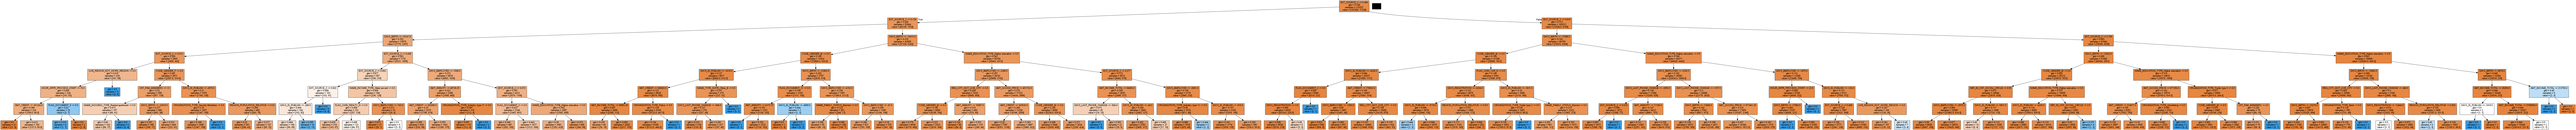

In [197]:
tree_graph_to_png(tree=tree, feature_names=X_train.columns,
                 png_file_to_save='decision_tree_fraud.png')

Image("decision_tree_fraud.png")

Now Let's test our model!

In [199]:
y_pred = tree.predict(X_holdout)

In [200]:
from sklearn.metrics import accuracy_score

accuracy_score(y_holdout,y_pred)

0.9184100418410042

Our accuracy score equals to 0.92!